In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv("../data/data.csv")

In [4]:
memcat = pd.read_csv("../data/memcat.csv")

In [5]:
resnet50 = pd.read_csv("../data/predictions_resnet50_memcat.csv")
resnet101 = pd.read_csv("../data/predictions_resnet101.csv")

## Real SemMem


In [6]:
data

,image,category,h,f,n_resp,rank,MemCat,h.1,f.1,n_resp.1,rank.1,new_image
0,000162.jpg,animal,17,31,48,0.354167,000000007566.jpg,77.0,15.0,87.0,0.885057,no
1,00058.jpg,animal,21,16,37,0.567568,000000026323.jpg,76.0,9.0,93.0,0.817204,no
2,000730.jpg,sports,19,16,35,0.542857,000000027439.jpg,92.0,3.0,114.0,0.807018,no
3,000247.jpg,food,17,17,34,0.500000,000000033633.jpg,99.0,3.0,105.0,0.942857,no
4,000323.jpg,food,17,27,44,0.386364,000000034523.jpg,88.0,11.0,94.0,0.936170,no
...,...,...,...,...,...,...,...,...,...,...,...,...
995,000498.jpg,food,19,30,49,0.387755,NaN,NaN,NaN,NaN,NaN,yes
996,000499.jpg,animal,17,30,47,0.361702,NaN,NaN,NaN,NaN,NaN,yes
997,000500.jpg,animal,21,31,52,0.403846,NaN,NaN,NaN,NaN,NaN,yes
998,000501.jpg,food,17,31,48,0.354167,NaN,NaN,NaN,NaN,NaN,yes


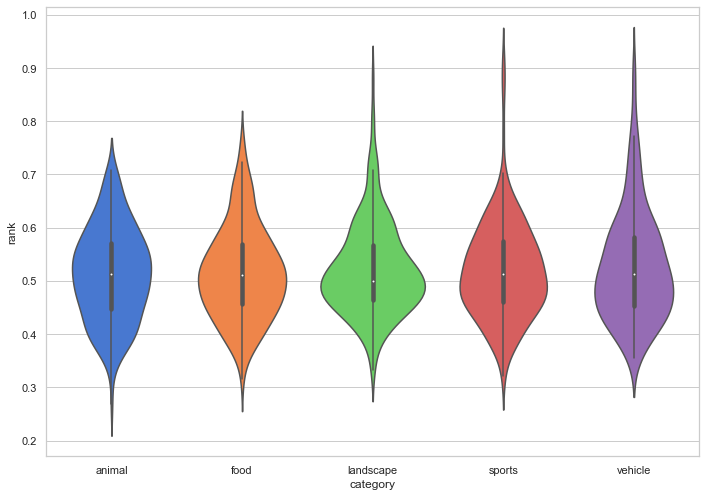

In [7]:
data_fig = sns.violinplot(
    saturation=1,
    data=data.sort_values(by="category"),
    x="category",
    y="rank",
    palette="muted",
)
plt.savefig("plot/semmem.png")

## MemCat


In [8]:
memcat.describe()

,rank
count,10000.000000
mean,0.758451
std,0.131130
min,0.205882
25%,0.686869
50%,0.785714
75%,0.854545
max,1.000000


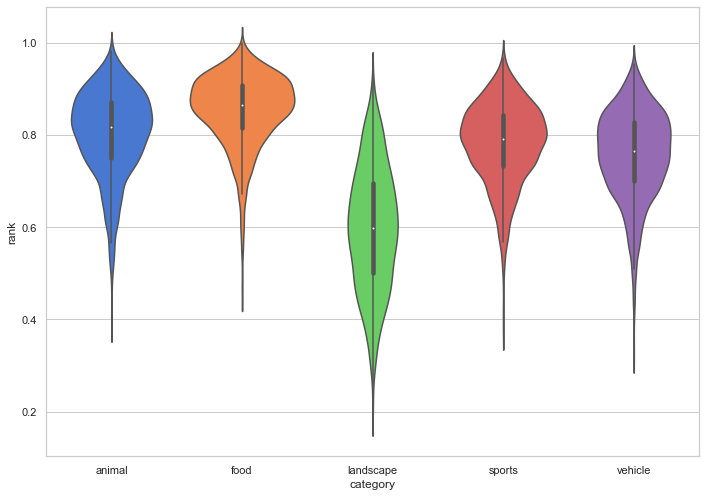

In [9]:
memcat_ax = sns.violinplot(
    saturation=1,
    data=memcat.sort_values(by="category"),
    x="category",
    y="rank",
    palette="muted",
)
plt.savefig("plot/memcat_ax.png")

## ResNet 50


In [10]:
resnet50_merged = pd.merge(data, resnet50, how="left", on=["image"])

In [11]:
resnet50_merged.describe()

,h,f,n_resp,rank,h.1,f.1,n_resp.1,rank.1,Unnamed: 0,real,prediction
count,1000.000000,1000.000000,1000.00000,1000.000000,830.000000,830.000000,830.000000,830.000000,1000.000000,1000.000000,1000.000000
mean,18.501000,17.951000,36.45200,0.519398,75.662651,6.260241,99.056627,0.763187,499.500000,0.519398,0.728659
std,1.757011,5.776155,5.80529,0.090983,15.402503,5.155693,9.980581,0.131419,288.819436,0.090983,0.168179
min,5.000000,2.000000,12.00000,0.269231,29.000000,0.000000,72.000000,0.311828,0.000000,0.269231,0.232966
25%,17.000000,14.000000,33.00000,0.459459,66.000000,3.000000,92.000000,0.687500,249.750000,0.459459,0.622084
50%,19.000000,18.000000,36.00000,0.513514,77.000000,5.000000,99.000000,0.792381,499.500000,0.513514,0.728757
75%,19.000000,22.000000,40.00000,0.575758,87.000000,9.000000,106.000000,0.860161,749.250000,0.575758,0.840365
max,27.000000,57.000000,78.00000,0.913043,116.000000,34.000000,128.000000,1.000000,999.000000,0.913043,1.387698


In [12]:
resnet101_merged = pd.merge(data, resnet101, how="left", on=["image"])

In [13]:
resnet101_merged.describe()

,h,f,n_resp,rank,h.1,f.1,n_resp.1,rank.1,Unnamed: 0,real,prediction
count,1000.000000,1000.000000,1000.00000,1000.000000,830.000000,830.000000,830.000000,830.000000,1000.000000,1000.000000,1000.000000
mean,18.501000,17.951000,36.45200,0.519398,75.662651,6.260241,99.056627,0.763187,499.500000,0.519398,0.761075
std,1.757011,5.776155,5.80529,0.090983,15.402503,5.155693,9.980581,0.131419,288.819436,0.090983,0.122524
min,5.000000,2.000000,12.00000,0.269231,29.000000,0.000000,72.000000,0.311828,0.000000,0.269231,0.361370
25%,17.000000,14.000000,33.00000,0.459459,66.000000,3.000000,92.000000,0.687500,249.750000,0.459459,0.688228
50%,19.000000,18.000000,36.00000,0.513514,77.000000,5.000000,99.000000,0.792381,499.500000,0.513514,0.774159
75%,19.000000,22.000000,40.00000,0.575758,87.000000,9.000000,106.000000,0.860161,749.250000,0.575758,0.840472
max,27.000000,57.000000,78.00000,0.913043,116.000000,34.000000,128.000000,1.000000,999.000000,0.913043,1.125628


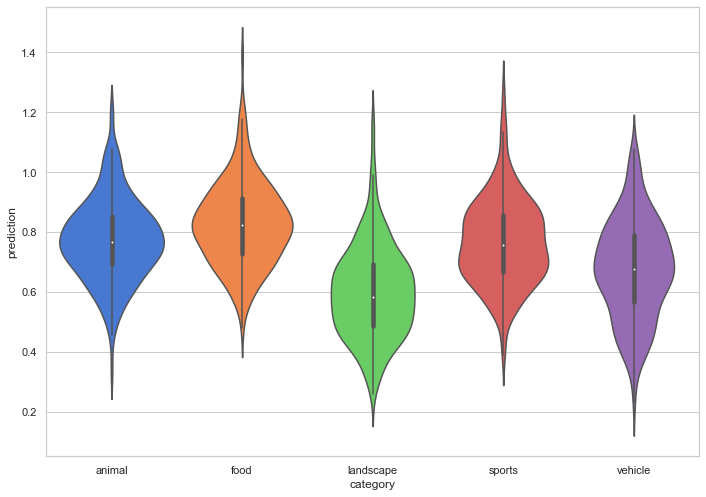

In [14]:
resnet50_ax = sns.violinplot(
    saturation=1,
    data=resnet50_merged.sort_values(by="category"),
    x="category",
    y="prediction",
    palette="muted",
)
plt.savefig("plot/resnet50_ax.png")

## ResNet 101


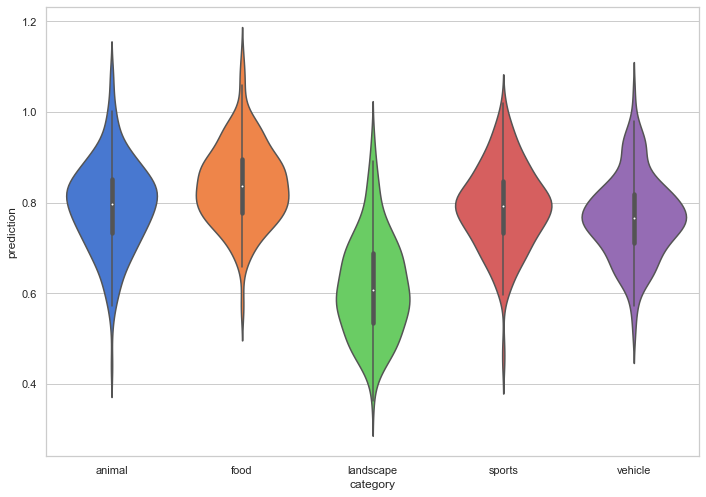

In [15]:
resnet101_ax = sns.violinplot(
    saturation=1,
    data=resnet101_merged.sort_values(by="category"),
    x="category",
    y="prediction",
    palette="muted",
)
plt.savefig("plot/resnet101_ax.png")

## get Average


In [16]:
data_avg = data["rank"].mean()
memcat_avg = memcat["rank"].mean()
resnet50_avg = resnet50["prediction"].mean()
resnet101_avg = resnet101["prediction"].mean()

In [17]:
print("data_avg: ", data_avg)
print("memcat_avg: ", memcat_avg)
print("resnet50_avg: ", resnet50_avg)
print("resnet101_avg: ", resnet101_avg)

data_avg:  0.519397881051
memcat_avg:  0.7584507575118998
resnet50_avg:  0.7286585722700916
resnet101_avg:  0.7610745188891413


## Compare


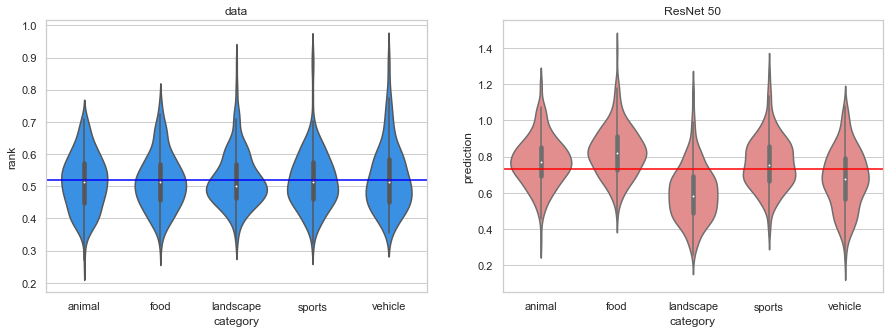

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title("data")
ax2.set_title("ResNet 50")

semmem_ax = sns.violinplot(
    data=data.sort_values(by="category"),
    x="category",
    y="rank",
    ax=ax1,
    color="dodgerblue",
)
resnet50_ax = sns.violinplot(
    data=resnet50_merged.sort_values(by="category"),
    x="category",
    y="prediction",
    ax=ax2,
    color="lightcoral",
)

ax1.axhline(y=data_avg, color="blue", linestyle="-")
ax2.axhline(y=resnet50_avg, color="red", linestyle="-")

plt.savefig("plot/data-vs-resnet50.png")

plt.show()

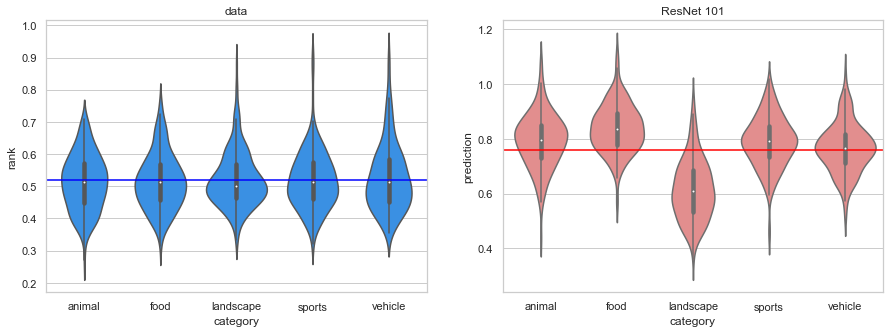

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title("data")
ax2.set_title("ResNet 101")

semmem_ax = sns.violinplot(
    data=data.sort_values(by="category"),
    x="category",
    y="rank",
    ax=ax1,
    color="dodgerblue",
)
resnet101_ax = sns.violinplot(
    data=resnet101_merged.sort_values(by="category"),
    x="category",
    y="prediction",
    ax=ax2,
    color="lightcoral",
)

ax1.axhline(y=data_avg, color="blue", linestyle="-")
ax2.axhline(y=resnet101_avg, color="red", linestyle="-")

plt.savefig("plot/data-vs-resnet101.png")

plt.show()

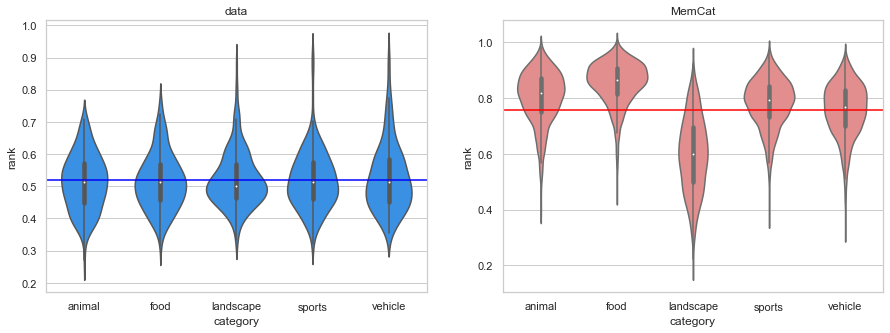

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title("data")
ax2.set_title("MemCat")


semmem_ax = sns.violinplot(
    data=data.sort_values(by="category"),
    x="category",
    y="rank",
    ax=ax1,
    color="dodgerblue",
)
vrnet_ax = sns.violinplot(
    data=memcat.sort_values(by="category"),
    x="category",
    y="rank",
    ax=ax2,
    color="lightcoral",
)

ax1.axhline(y=data_avg, color="blue", linestyle="-")
ax2.axhline(y=memcat_avg, color="red", linestyle="-")

plt.savefig("plot/data-vs-memcat.png")

plt.show()

In [21]:
data["rank"].describe()

count    1000.000000
mean        0.519398
std         0.090983
min         0.269231
25%         0.459459
50%         0.513514
75%         0.575758
max         0.913043
Name: rank, dtype: float64

In [22]:
memcat["rank"].describe()

count    10000.000000
mean         0.758451
std          0.131130
min          0.205882
25%          0.686869
50%          0.785714
75%          0.854545
max          1.000000
Name: rank, dtype: float64

## new image


In [23]:
new_image = data[data["new_image"] == "yes"]

In [24]:
new_image

,image,category,h,f,n_resp,rank,MemCat,h.1,f.1,n_resp.1,rank.1,new_image
830,000333.jpg,vehicle,17,3,20,0.850000,NaN,NaN,NaN,NaN,NaN,yes
831,000334.jpg,sports,21,6,27,0.777778,NaN,NaN,NaN,NaN,NaN,yes
832,000335.jpg,vehicle,19,7,26,0.730769,NaN,NaN,NaN,NaN,NaN,yes
833,000336.jpg,food,21,7,28,0.750000,NaN,NaN,NaN,NaN,NaN,yes
834,000337.jpg,landscape,21,8,29,0.724138,NaN,NaN,NaN,NaN,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
995,000498.jpg,food,19,30,49,0.387755,NaN,NaN,NaN,NaN,NaN,yes
996,000499.jpg,animal,17,30,47,0.361702,NaN,NaN,NaN,NaN,NaN,yes
997,000500.jpg,animal,21,31,52,0.403846,NaN,NaN,NaN,NaN,NaN,yes
998,000501.jpg,food,17,31,48,0.354167,NaN,NaN,NaN,NaN,NaN,yes


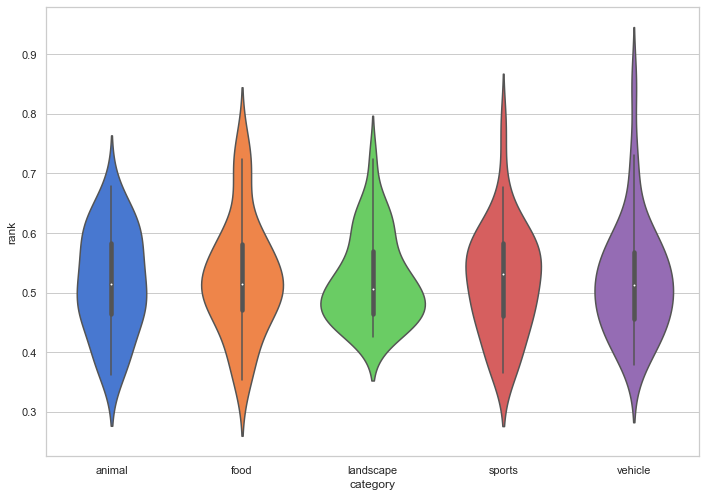

In [25]:
data_fig = sns.violinplot(
    saturation=1,
    data=new_image.sort_values(by="category"),
    x="category",
    y="rank",
    palette="muted",
)
plt.savefig("plot/semmem_new.png")

In [26]:
new_image_avg = new_image["rank"].mean()

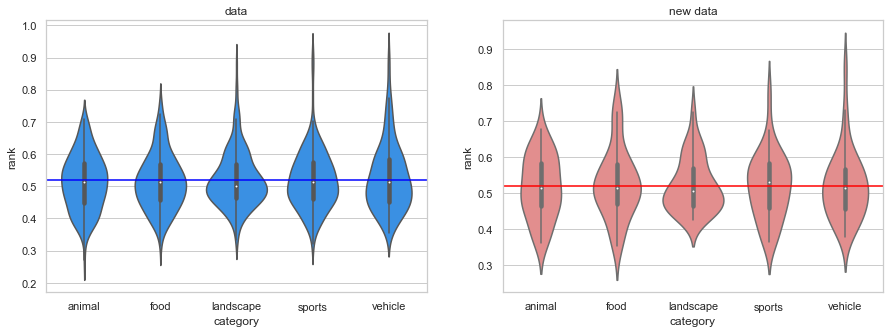

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title("data")
ax2.set_title("new data")

semmem_ax = sns.violinplot(
    data=data.sort_values(by="category"),
    x="category",
    y="rank",
    ax=ax1,
    color="dodgerblue",
    columns=["food"],
)
resnet50_ax = sns.violinplot(
    data=new_image.sort_values(by="category"),
    x="category",
    y="rank",
    ax=ax2,
    color="lightcoral",
)

ax1.axhline(y=data_avg, color="blue", linestyle="-")
ax2.axhline(y=new_image_avg, color="red", linestyle="-")

plt.savefig("plot/data_vs_newdata.png")

plt.show()